# Hacker News Project

[Hacker News](https://en.wikipedia.org/wiki/Hacker_News) is a social news website focusing on computer science and entrepreneurship. The word hacker in "Hacker News" is used in its original meaning and refers to the hacker culture which consists of people who enjoy tinkering with technology. This project looks into the posts on the Hacker News website.

The purpose of this project is to answer the following:

1. Determine which type of post, 'Ask HN' or 'Show HN', recieves more comments.
2. Do posts created at a certain time receive more comments on average?

In [2]:
import pandas as pd
import os
import numpy as np
import csv

In [3]:
data_csv = "HN_posts_year_to_Sep_26_2016.csv"

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data = os.path.join(parent_dir, 'data', data_csv)

In [7]:
# Reading in data as a list of lists instead of a df. Only since beginner course and working with lists
file = open(data, encoding="utf8") # Had to specify because of coding error. 
hn = list(csv.reader(file))
hn[:5] #Quick look

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'],
 ['12579008',
  'You have two days to comment if you want stem cells to be classified as your own',
  'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018',
  '1',
  '0',
  'altstar',
  '9/26/2016 3:26'],
 ['12579005',
  'SQLAR  the SQLite Archiver',
  'https://www.sqlite.org/sqlar/doc/trunk/README.md',
  '1',
  '0',
  'blacksqr',
  '9/26/2016 3:24'],
 ['12578997',
  'What if we just printed a flatscreen television on the side of our boxes?',
  'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43',
  '1',
  '0',
  'pavel_lishin',
  '9/26/2016 3:19'],
 ['12578989',
  'algorithmic music',
  'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext',
  '1',
  '0',
  'poindontcare',
  '9/26/2016 3:16']]

In [8]:
#Get header row
headers = hn[0]
print(headers) # Looking at the header variable
hn = hn[1:] # Removing the header from the dataset
hn[:1] #Making sure the dataset has the header removed. 

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


[['12579008',
  'You have two days to comment if you want stem cells to be classified as your own',
  'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018',
  '1',
  '0',
  'altstar',
  '9/26/2016 3:26']]

#### Find the number of posts associated with Ask, Show, or Other

In [12]:
#Create 3 lists outside the loop
ask_hn = []
show_hn = []
other_hn = []

#loop through rows in hn
for each in hn:
    title = each[1]
    title = title.lower()
    if title.startswith('ask hn'):
        ask_hn.append(each)
    elif title.startswith('show hn'):
        show_hn.append(each)
    else:
        other_hn.append(each)

#Check length of each list
print("Ask_hn Post Count:" + str(len(ask_hn)))
print("Show_hn Post Count:" + str(len(show_hn)))
print("Other_hn Post Count:" + str(len(other_hn)))

Ask_hn Post Count:9139
Show_hn Post Count:10158
Other_hn Post Count:273822


Ask and show are relativly close in their post counts, while other is much larger, but we want to continue to analyze ask and show because they are more defined. 

Next let examine the comments for each of these posts.


In [13]:
#Find the total and average amount of comments for the Ask_hn and Show_hn lists. 

#Find total comments for ask_hn
total_ask_comments = 0
for each in ask_hn:
    comment_count = int(each[4]) #comment_count column id = 4
    total_ask_comments += comment_count

#Find total commments for show_hn
total_show_comments = 0
for each in show_hn:
    comment_count = int(each[4]) #comment_count column id = 4
    total_show_comments += comment_count
    
#Find avg comments
avg_ask_comments = total_ask_comments / len(ask_hn) #comment count / ask posts count
avg_show_comments = total_show_comments / len(show_hn) #comment count / show posts count

print('Ask HN Total comments= ', total_ask_comments)
print('Ask HN Average comments= {}'.format(avg_ask_comments))
print('Show HN Total comments = ', total_show_comments)
print('Show HN Average comments = {}'.format(avg_show_comments))

Ask HN Total comments=  94986
Ask HN Average comments= 10.393478498741656
Show HN Total comments =  49633
Show HN Average comments = 4.886099625910612


The data shows there are overall more comments on 'Ask HN' posts, as well as more comments on average from these posts. <br>
Now lets examine if there is a specific time of day that these posts receive more comments. 

In [27]:
#Count the ask posts grouped by each hour of the day 
#Avg the ask posts grouped by each hour of the day
#Use datetime.strptime()
import random
import datetime as dt 
result_list = []
#iterate ask_posts and append result_list with num comments
for each in ask_hn:
    created_at = each[6] #created at column for each post in df
    num_comments = int(each[4]) #post count column in df
    
    result_list.append(["ask_hn",created_at,num_comments])
    
print(result_list[:2])


#iterate ask_posts and append result_list with num comments
for each in show_hn:
    created_at = each[6] #created at column for each post in df
    num_comments = int(each[4]) #post count column in df
    
    result_list.append(["show_hn",created_at,num_comments])
    
print(random.sample(result_list,20))


[['ask_hn', '9/26/2016 2:53', 7], ['ask_hn', '9/26/2016 1:17', 3]]
[['show_hn', '9/12/2015 13:45', 0], ['show_hn', '9/21/2015 17:46', 0], ['ask_hn', '6/5/2016 21:56', 49], ['show_hn', '5/4/2016 16:28', 0], ['ask_hn', '1/5/2016 18:28', 1], ['ask_hn', '9/7/2016 15:57', 0], ['show_hn', '5/10/2016 18:14', 3], ['show_hn', '11/24/2015 19:23', 2], ['show_hn', '11/21/2015 18:10', 0], ['show_hn', '11/29/2015 23:11', 43], ['show_hn', '8/10/2016 15:46', 2], ['ask_hn', '3/28/2016 15:17', 31], ['ask_hn', '2/16/2016 8:24', 0], ['show_hn', '7/11/2016 14:56', 1], ['ask_hn', '5/2/2016 10:18', 13], ['show_hn', '8/8/2016 16:00', 0], ['show_hn', '12/18/2015 18:12', 180], ['show_hn', '12/2/2015 18:52', 0], ['ask_hn', '2/13/2016 3:17', 5], ['show_hn', '5/12/2016 16:28', 1]]


In [49]:
    
#create two dictionaries posts_by_hour and comments_by_hour
posts_by_hour_ask = {}
posts_by_hour_show = {}
comments_by_hour_ask = {}
comments_by_hour_show = {}
date_format = '%m/%d/%Y %H:%M'
    
#loop through result_list and extract the hour from the date, being the first element of the row
for each in result_list:
    category = each[0]
    date = each[1] #put date-string into a variable
    comment = each[2] 
    hour = dt.datetime.strptime(date, date_format).strftime('%H') #strip the hour from the string
    if category == "ask_hn":
        if hour not in posts_by_hour_ask:
            posts_by_hour_ask[hour] = 1
            comments_by_hour_ask[hour] = comment
        else:
            posts_by_hour_ask[hour] += 1
            comments_by_hour_ask[hour] += comment
    
    elif category == "show_hn":
        if hour not in posts_by_hour_show:
            posts_by_hour_show[hour] = 1
            comments_by_hour_show[hour] = comment
        else:
            posts_by_hour_show[hour] += 1
            comments_by_hour_show[hour] += comment


# Sort the hours from 0 to 23
comments_sorted_hours_ask = sorted(comments_by_hour_ask.keys())
comments_sorted_hours_show = sorted(comments_by_hour_show.keys())

posts_sorted_hour_ask = sorted(posts_by_hour_ask)#.keys()) #call the keys to sort the keys / hours in a list
posts_sorted_hour_show = sorted(posts_by_hour_show.keys()) #can't sort them if they are still a dictionary

print("Ask HN Posts:")
print(comments_by_hour_ask)
print(posts_by_hour_ask)

print("Show HN Posts:")
print(comments_by_hour_show)
print(posts_by_hour_show)


print(comments_sorted_hours_ask)
print(posts_sorted_hour_ask)
print(posts_sorted_hour_show)

Ask HN Posts:
{'02': 2996, '01': 2089, '22': 3372, '21': 4500, '19': 3954, '17': 5547, '15': 18525, '14': 4972, '13': 7245, '11': 2797, '10': 3013, '09': 1477, '07': 1585, '03': 2154, '23': 2297, '20': 4462, '16': 4466, '08': 2362, '00': 2277, '18': 4877, '12': 4234, '04': 2360, '06': 1587, '05': 1838}
{'02': 269, '01': 282, '22': 383, '21': 518, '19': 552, '17': 587, '15': 646, '14': 513, '13': 444, '11': 312, '10': 282, '09': 222, '07': 226, '03': 271, '23': 343, '20': 510, '16': 579, '08': 257, '00': 301, '18': 614, '12': 342, '04': 243, '06': 234, '05': 209}
Show HN Posts:
{'00': 1283, '23': 1444, '20': 2183, '19': 2791, '18': 3242, '16': 3769, '14': 3839, '10': 1228, '09': 1411, '08': 1771, '06': 904, '03': 934, '21': 1759, '17': 3236, '15': 3824, '11': 2413, '07': 1577, '04': 978, '13': 3314, '12': 3609, '01': 1006, '22': 1450, '02': 1076, '05': 592}
{'00': 276, '23': 319, '20': 525, '19': 556, '18': 656, '16': 801, '14': 696, '10': 323, '09': 302, '08': 316, '06': 192, '03': 206

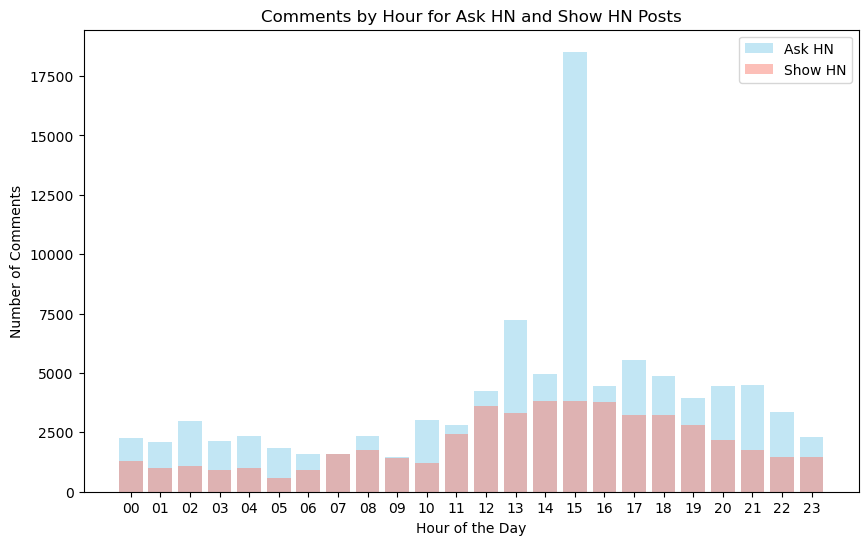

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot Ask HN comments by hour
plt.bar(comments_sorted_hours_ask, [comments_by_hour_ask[hour] for hour in comments_sorted_hours_ask], color='skyblue', alpha=0.5, label='Ask HN')

# Plot Show HN comments by hour
plt.bar(comments_sorted_hours_show, [comments_by_hour_show[hour] for hour in comments_sorted_hours_show], color='salmon', alpha=0.5, label='Show HN')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.title('Comments by Hour for Ask HN and Show HN Posts')
plt.xticks(range(24))
plt.legend()
plt.grid(False)
plt.show()

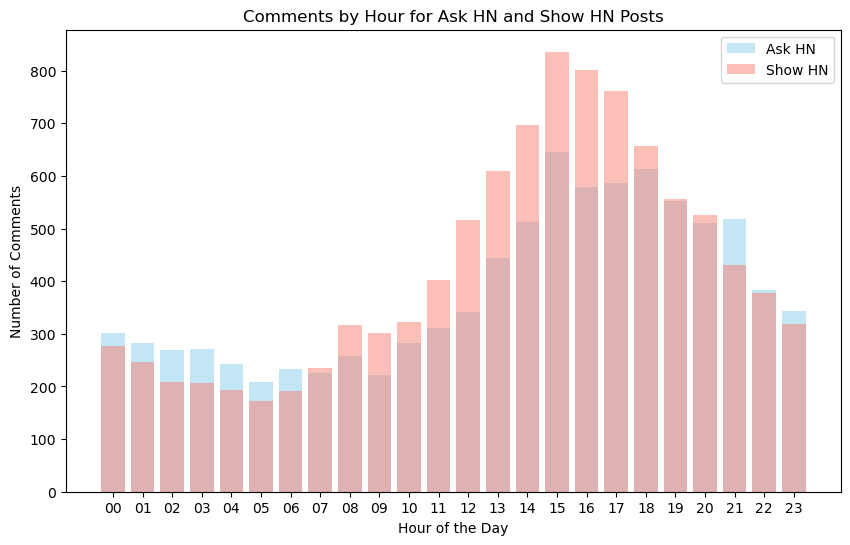

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot Ask HN comments by hour
plt.bar(posts_sorted_hour_ask, [posts_by_hour_ask[hour] for hour in posts_sorted_hour_ask], color='skyblue', alpha=0.5, label='Ask HN')

# Plot Show HN comments by hour
plt.bar(posts_sorted_hour_show, [posts_by_hour_show[hour] for hour in posts_sorted_hour_show], color='salmon', alpha=0.5, label='Show HN')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.title('Comments by Hour for Ask HN and Show HN Posts')
plt.xticks(range(24))
plt.legend()
plt.grid(False)
plt.show()

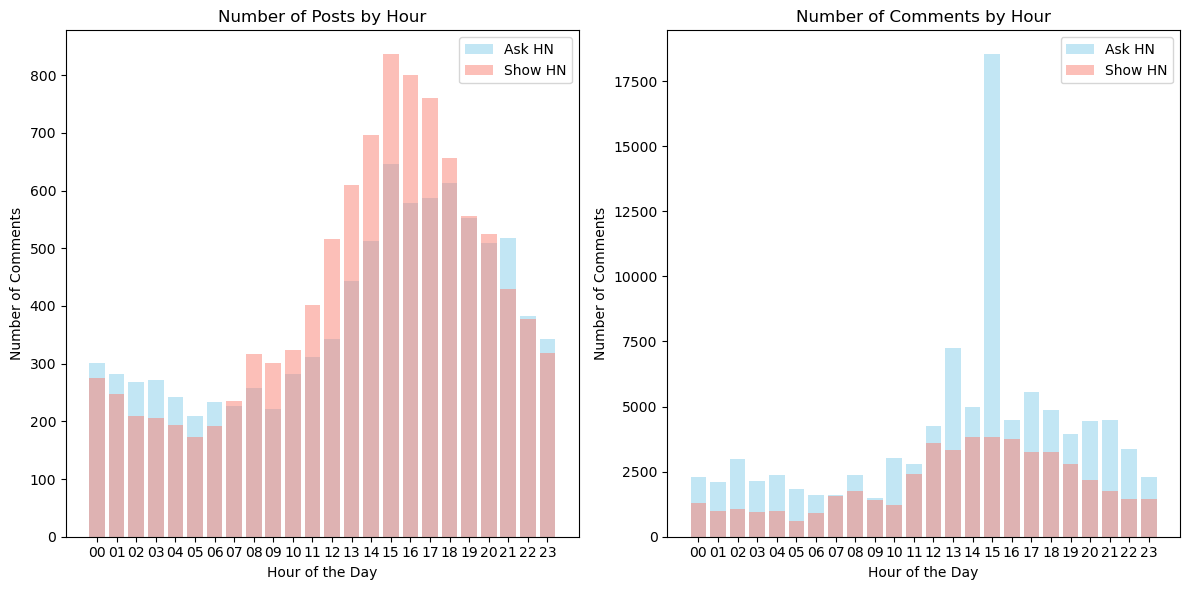

<Figure size 640x480 with 0 Axes>

In [59]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot for posts
plt.subplot(1, 2, 1)
plt.bar(posts_sorted_hour_ask, [posts_by_hour_ask[hour] for hour in posts_sorted_hour_ask], color='skyblue', alpha=0.5, label='Ask HN')
plt.bar(posts_sorted_hour_show, [posts_by_hour_show[hour] for hour in posts_sorted_hour_show], color='salmon', alpha=0.5, label='Show HN')
plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.title('Number of Posts by Hour')
plt.xticks(range(24))
plt.grid(False)

# Plot for comments
plt.subplot(1, 2, 2)
plt.bar(comments_sorted_hours_ask, [comments_by_hour_ask[hour] for hour in comments_sorted_hours_ask], color='skyblue', alpha=0.5, label='Ask HN')
plt.bar(comments_sorted_hours_show, [comments_by_hour_show[hour] for hour in comments_sorted_hours_show], color='salmon', alpha=0.5, label='Show HN')
plt.legend()
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Hour')
plt.xticks(range(24))
plt.grid(False)

plt.tight_layout()
plt.show()

## Calculating the Avg Num of Comments on Posts by Hour

In [71]:
# create empty list to store the avgerages
avg_by_hour = []

#Loop over comments_by_hour list. Append the key(hour) and the value(total_comments)/value(total posts) 
for each in comments_by_hour:
    avg_by_hour.append([each,comments_by_hour[each] / posts_by_hour[each]])
    
avg_by_hour

[['02', 11.137546468401487],
 ['01', 7.407801418439717],
 ['22', 8.804177545691905],
 ['21', 8.687258687258687],
 ['19', 7.163043478260869],
 ['17', 9.449744463373083],
 ['15', 28.676470588235293],
 ['14', 9.692007797270955],
 ['13', 16.31756756756757],
 ['11', 8.96474358974359],
 ['10', 10.684397163120567],
 ['09', 6.653153153153153],
 ['07', 7.013274336283186],
 ['03', 7.948339483394834],
 ['23', 6.696793002915452],
 ['20', 8.749019607843136],
 ['16', 7.713298791018998],
 ['08', 9.190661478599221],
 ['00', 7.5647840531561465],
 ['18', 7.94299674267101],
 ['12', 12.380116959064328],
 ['04', 9.7119341563786],
 ['06', 6.782051282051282],
 ['05', 8.794258373205741]]

### Sort the values

In [85]:
swap_avg_by_hour = []
for each in avg_by_hour:
    swap_avg_by_hour.append([each[1],each[0]])


sorted_swap = sorted(swap_avg_by_hour, reverse = True)
print(sorted_swap[0])
print('Top 5 Hours for Ask Posts Comments')
for avg, hr in sorted_swap[:5]:
     print('{}:{:.2f} average comments per post.'.format(dt.datetime.strptime(hr,'%H').strftime('%H:%M'),avg))
    

[28.676470588235293, '15']
Top 5 Hours for Ask Posts Comments
15:00:28.68 average comments per post.
13:00:16.32 average comments per post.
12:00:12.38 average comments per post.
02:00:11.14 average comments per post.
10:00:10.68 average comments per post.


The hour that receives the most comments per post on average in 15:00 with an average of 23.68 comments per post. According the to [documentation](https://www.kaggle.com/hacker-news/hacker-news-posts/home) this translates to 3:00 PM EST. 